In [9]:
import pandas as pd
from math import sqrt
import os
import seaborn as sns
from matplotlib import pyplot as plt

csv_folder = "../csvs/correlacao_linear_simples/"
## CASO NÃO ESTEJA ENCONTRANDO OS ARQUIVOS, SÓ PEGA E DESCOMENTA A LINHA DEBAIXO PRA ELE PEGAR E TROCAR DE DIRETÓRIO
# os.chdir(f"../{csv_folder}")

In [10]:
dataframe = pd.read_csv(f"{csv_folder}idade_assinaturas.csv")
print(dataframe)

   idade  assinaturas
0     55            2
1     48            3
2     26            0
3     21            4
4     33            3
5     50            0
6     64            6
7     35            1


# Preparando os dados pra Formula

- list_x = Lista com os valores da variavel X
- list_y = Lista com os valores da variavel Y

- n = Quantidade de Pares de Dados (tamanho da lista)

- sum_of_x = Somatório dos valores da variavel X => $\sum_x$ 
- sum_of_y = Somatório dos valores da variavel Y => $\sum_y$ 

- sum_of_squared_x = Somatório dos valores ao quadrado da variavel X => $\sum_{x²}$ 
- sum_of_squared_y = Somatório dos valores ao quadrado da variavel Y => $\sum_{y²}$

- sum_of_xy = Somatório dos valores de X multiplicado por Y => $\sum_{x*y}$

In [11]:
list_x = list(dataframe.items())[0][1]
list_y = list(dataframe.items())[1][1]

n = len(dataframe)
print(f"\nN = {n}")

sum_of_x = sum(list_x)
print(f"Somatório de X = {sum_of_x}")
sum_of_y = sum(list_y)
print(f"Somatório de Y = {sum_of_y}")

sum_of_squared_x = sum([*map(lambda x : x**2, list_x)])
print(f"Somatório de X ao quadrado = {sum_of_squared_x}")
sum_of_squared_y = sum([*map(lambda y : y**2, list_y)])
print(f"Somatório de Y ao quadrado = {sum_of_squared_y}")

sum_of_xy = 0

for i in range(n):
    sum_of_xy += list_x[i] * list_y[i]

print(f"Somatório de X e Y = {sum_of_xy}")


N = 8
Somatório de X = 332
Somatório de Y = 19
Somatório de X ao quadrado = 15356
Somatório de Y ao quadrado = 75
Somatório de X e Y = 856


# Resolvendo a Fórmula

Fórmula Total = $\frac{\sum_{xy} - \frac{\sum_{x} * \sum{y}}{n}}{\sqrt{\sum{x^{2}} - \frac{(\sum{x})^{2}}{n}}  * \sqrt{\sum{y^{2}} - \frac{(\sum{y})^{2}}{n}}}$

vou dividir em partes...

part1 = $\sum_{xy} - \frac{\sum_{x}\sum{y}}{n}$

part2 = $\sqrt{\sum{x^{2}} - \frac{(\sum{x})^{2}}{n}}$

part3 = $\sqrt{\sum{y^{2}} * \frac{(\sum{y})^{2}}{n}}$


então fica mais facil já que basicamente vai virar isso = $\frac{part1}{part2 - part3}$



In [12]:
part1 = sum_of_xy - ((sum_of_x * sum_of_y)/n)
print(f"part1 = {part1}")

part2 = sqrt(sum_of_squared_x - ((sum_of_x**2)/n))
print(f"part2 = {part2}")

part3 = sqrt(sum_of_squared_y - ((sum_of_y**2)/n))
print(f"part3 = {part3}\n")


correlation_coeficient = part1 / (part2 * part3)

print(f"Coeficiente de Correlação é = {correlation_coeficient}")
print(f"Procure na tabela de Pearson o valor para a quantidade de dados = {n}, e compare o coeficiente\nCaso o coeficiente seja maior então é Relevante")

if correlation_coeficient > 0.5:
    print("A Correlação é Forte e Positiva")
elif correlation_coeficient > 0:
    print("A Correlação é Fraca e Positiva")
elif correlation_coeficient > -0.5:
    print("Correlação é Fraca e Negativa")
else:
    print("Correlação é Forte e Negativa")


part1 = 67.5
part2 = 39.72404813208241
part3 = 5.465802777268862

Coeficiente de Correlação é = 0.3108825291442929
Procure na tabela de Pearson o valor para a quantidade de dados = 8, e compare o coeficiente
Caso o coeficiente seja maior então é Relevante
A Correlação é Fraca e Positiva


# Gráfico de Dispersão do conjunto

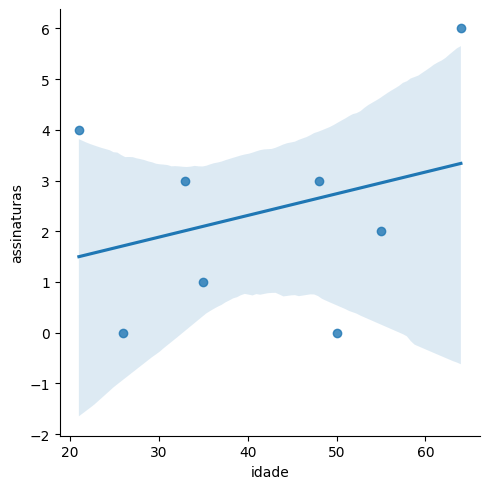

In [13]:

grafico = sns.lmplot(data=dataframe, x=dataframe.columns[0],y=dataframe.columns[1])

plt.show()